#Design of LSTM and GRU RNN for classification of IMDB reviews

#Importing Libraries

In [ ]:
                            import numpy as np
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers import  Dense, Embedding, LSTM, Bidirectional

Open the data set

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.describe

<bound method NDFrame.describe of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import nltk 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing. text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.optimizers import RMSprop , Adam 
from keras.models import Sequential 
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, Bidirectional, Dropout
from nltk.corpus import stopwords 
nltk.download('stopwords')
",".join(stopwords.words('english')) 
STOPWORDS = set(stopwords.words('english')) 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
y =df['sentiment'] 
X=[] 
for review in df['review']: 
    filtered_sentence = [w.lower() for w in review.split() if not w in STOPWORDS ] 
    X.append(filtered_sentence) 
X = pd.Series(X) 


In [ ]:
y_tokenizer = Tokenizer() 
y_tokenizer.fit_on_texts(y) 
y_seq = np.array(y_tokenizer.texts_to_sequences (y)) 


In [ ]:
x_token = Tokenizer(num_words=5000,oov_token='<oov>') 
x_token.fit_on_texts(X) 
word_index = x_token.word_index 
X_sequence = x_token.texts_to_sequences(X) 
dict(list(word_index.items())[0:15]) 

{'<oov>': 1,
 'i': 2,
 '/><br': 3,
 'the': 4,
 'movie': 5,
 'film': 6,
 'one': 7,
 'like': 8,
 'this': 9,
 'would': 10,
 'even': 11,
 'good': 12,
 'really': 13,
 'it': 14,
 'see': 15}

In [ ]:
x_padding= pad_sequences (X_sequence, maxlen=200, padding='post')  

In [ ]:
print(y_seq.shape) 
print(x_padding.shape)

(50000, 1)
(50000, 200)


Dataset preparation

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x_padding, y_seq, train_size=0.7)

In [ ]:
print(x_train.shape, x_test.shape) 
print(y_train.shape, y_test.shape)

(35000, 200) (15000, 200)
(35000, 1) (15000, 1)


Model creation

In [ ]:
vocab_size = 5000 
embedding_dim = 64 
max_length = 200 

In [ ]:
model1 = Sequential() 
model1.add(Embedding(vocab_size, embedding_dim)) 
model1.add(LSTM(embedding_dim)) 
model1.add(Dense(embedding_dim, activation='tanh')) 
model1.add(Dense(6, activation='softmax')) 

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 357,574
Trainable params: 357,574
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) 


In [ ]:
  history1 = model1.fit(x_train,y_train, epochs=20, verbose=2, validation_split=0.2) 

Epoch 1/20
875/875 - 65s - loss: 0.7111 - accuracy: 0.5023 - val_loss: 0.6990 - val_accuracy: 0.5079 - 65s/epoch - 74ms/step
Epoch 2/20
875/875 - 62s - loss: 0.6794 - accuracy: 0.5388 - val_loss: 0.6643 - val_accuracy: 0.5543 - 62s/epoch - 71ms/step
Epoch 3/20
875/875 - 62s - loss: 0.6027 - accuracy: 0.6453 - val_loss: 0.4671 - val_accuracy: 0.8004 - 62s/epoch - 71ms/step
Epoch 4/20
875/875 - 63s - loss: 0.3271 - accuracy: 0.8664 - val_loss: 0.3177 - val_accuracy: 0.8641 - 63s/epoch - 72ms/step
Epoch 5/20
875/875 - 64s - loss: 0.2397 - accuracy: 0.9084 - val_loss: 0.3418 - val_accuracy: 0.8629 - 64s/epoch - 73ms/step
Epoch 6/20
875/875 - 62s - loss: 0.1909 - accuracy: 0.9323 - val_loss: 0.3314 - val_accuracy: 0.8671 - 62s/epoch - 71ms/step
Epoch 7/20
875/875 - 62s - loss: 0.1522 - accuracy: 0.9498 - val_loss: 0.4029 - val_accuracy: 0.8629 - 62s/epoch - 71ms/step
Epoch 8/20
875/875 - 71s - loss: 0.1173 - accuracy: 0.9642 - val_loss: 0.4204 - val_accuracy: 0.8583 - 71s/epoch - 81ms/step


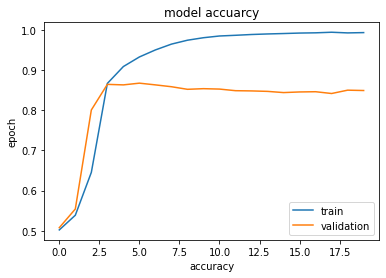

In [ ]:
plt.plot(history1.history['accuracy']) 
plt.plot(history1.history['val_accuracy']) 
plt.title('model accuarcy') 
plt.xlabel('accuracy') 
plt.ylabel('epoch') 
plt.legend(['train', 'validation']) 
plt.show()

In [ ]:
model2 = Sequential() 
model2.add(Embedding(vocab_size, embedding_dim)) 
model2.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu')) model2.add(MaxPooling1D((2))) 
model2.add(LSTM(embedding_dim)) 
model2.add(Dense(128, activation= 'relu')) model2.add(Dense(6, activation='softmax')) 


In [ ]:
mode12. summary()

In [ ]:
model2.compile (optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy']


In [ ]:
history2 = mode12. fit(x_train,y_train, epochs=10,validation_split=0.2, verbose=2) 